# Task 3: Linear Regression Model

##Loading the dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Display plots inline (for Jupyter notebooks)
%matplotlib inline

# Load the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Load the dataset into a pandas DataFrame
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Display the first few rows of the dataset
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##Feature and Target selection

In [ ]:
# Select three features and the target variable
X = df[["MedInc", "HouseAge", "AveRooms"]]  # Features: Median Income, House Age, Average Rooms
y = df["MedHouseVal"]  # Target variable: Median House Value


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Implementing Linear Regression

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Test the model on the test data
y_pred = model.predict(X_test)

# Calculate and display model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.6589108649336336
R^2 Score: 0.49717158850807075


##Evaluation and Visualisation

In [ ]:
# Define custom inputs for prediction (three values for MedInc, HouseAge, AveRooms)
# custom_input = [[8.5, 25, 6], [5.5, 15, 4], [3.2, 40, 7]]  # Example custom inputs
MedInc = float(input("Enter the Median Income: "))
HouseAge = float(input("Enter the House Age: "))
AveRooms = float(input("Enter the Average Number of Rooms: "))
custom_input = [[MedInc, HouseAge, AveRooms]]  # Example custom inputs
# Predict house values for the custom inputs
custom_pred = model.predict(custom_input)

# Display the predicted values for the custom inputs
for i, pred in enumerate(custom_pred):
    print(f"Custom Input {i+1} (MedInc: {custom_input[i][0]}, HouseAge: {custom_input[i][1]}, AveRooms: {custom_input[i][2]}) => Predicted Price: USD {pred*100000}")


Enter the Median Income: 7
Enter the House Age: 2
Enter the Average Number of Rooms: 2
Custom Input 1 (MedInc: 7.0, HouseAge: 2.0, AveRooms: 2.0) => Predicted Price: USD 310797.3367067388


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


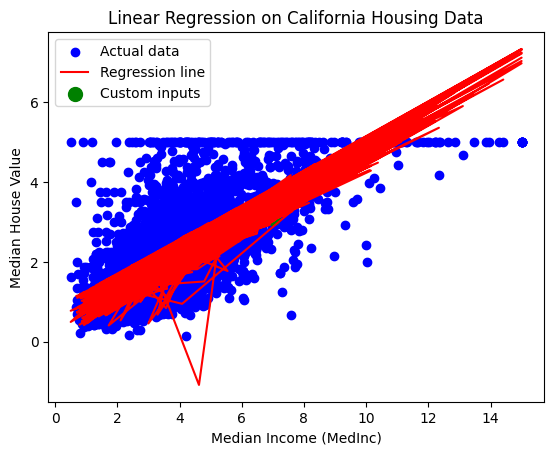

In [ ]:
# Plot the data points (Median Income vs. Median House Value)
plt.scatter(X_test['MedInc'], y_test, color="blue", label="Actual data")

# Plot the regression line (using the test set predictions)
plt.plot(X_test['MedInc'], model.predict(X_test), color="red", label="Regression line")

# Plot the custom input points
custom_inputs_medinc = [i[0] for i in custom_input]  # Extract Median Income values for custom inputs
plt.scatter(custom_inputs_medinc, custom_pred, color="green", label="Custom inputs", s=100)

# Labels and legend
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Linear Regression on California Housing Data")
plt.show()
